야구선수 순위에 따른 분석

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import font_manager
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [6]:
df1 = pd.read_csv("https://raw.githubusercontent.com/LBang98/1-1/main/hitter.csv")
df1.index = df1.index + 1

df2 = pd.read_csv("https://raw.githubusercontent.com/LBang98/1-1/main/pitcher.csv")
df2.index = df2.index + 1


AVG (Batting Average): 타율

G (Games Played): 출장 경기 수

PA (Plate Appearances): 타석 - 선수가 경기에서 타격 기회를 가진 총 횟수입니다.

AB (At Bats): 타수

R (Runs): 득점

H (Hits): 안타

2B (Doubles): 2루타

3B (Triples): 3루타

HR (Home Runs): 홈런

TB (Total Bases): 총 루타 - 선수가 친 안타로 인해 얻은 총 베이스 수입니다.

RBI (Runs Batted In): 타점

SAC (Sacrifice Hits): 희생타

SF (Sacrifice Flies): 희생 플라이

SALARY: 연봉

In [23]:
df1

,Name,Team,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF,SALARY,Performance_Index
1,손아섭,NC,0.339,140,609,551,97,187,36,3,5,244,65,1,5,50000,0.001407
2,구자욱,삼성,0.336,119,515,453,65,152,37,1,11,224,71,2,3,200000,0.000412
3,김혜성,키움,0.335,137,621,556,104,186,29,6,7,248,57,0,5,42000,0.001532
4,홍창기,LG,0.332,141,643,524,109,174,35,2,1,216,65,3,6,30000,0.002211
5,에레디아,SSG,0.323,122,523,473,76,153,29,0,12,218,76,1,1,130000,0.000679
6,김선빈,KIA,0.320,119,473,419,41,134,16,0,0,150,48,8,3,45000,0.001074
7,박건우,NC,0.319,130,533,458,70,146,34,2,12,220,85,1,9,90000,0.001081
8,박민우,NC,0.316,124,509,452,76,143,20,7,2,183,46,5,3,110000,0.000439
9,오스틴,LG,0.313,139,583,520,87,163,29,4,23,269,95,0,7,91000,0.001300
10,전준우,롯데,0.312,138,559,493,80,154,21,3,17,232,77,0,7,50000,0.001886


In [7]:
#홈런(HR) 선두 선수
top_hr_player_info = df1.loc[df1['HR'].idxmax(), ['Name', 'Team']]

#타점(RBI) 선두 선수
top_rbi_player_info = df1.loc[df1['RBI'].idxmax(), ['Name', 'Team']]

#안타(H) 선두 선수
top_hits_player_info = df1.loc[df1['H'].idxmax(), ['Name', 'Team']]

print("홈런 많이 친 선수: ",top_hr_player_info)
print("타점 높은 선수: ",top_rbi_player_info)
print("안타 많이 친 선수: ",top_hits_player_info)


홈런 많이 친 선수:  Name    노시환
Team     한화
Name: 15, dtype: object
타점 높은 선수:  Name    노시환
Team     한화
Name: 15, dtype: object
안타 많이 친 선수:  Name    손아섭
Team     NC
Name: 1, dtype: object


In [8]:
# 팀별 타자 성적 계산 (평균 타율, 홈런, 타점)
df1.groupby('Team').mean(numeric_only=True)[['AVG', 'HR', 'RBI']]

,AVG,HR,RBI
Team,,,
KIA,0.302000,10.000000,69.250000
KT,0.290400,10.600000,62.400000
LG,0.303000,8.000000,72.666667
NC,0.314250,9.000000,71.500000
SSG,0.310000,20.500000,81.500000
두산,0.296000,9.500000,50.500000
롯데,0.302000,12.500000,70.000000
삼성,0.303667,14.333333,76.000000
키움,0.335000,7.000000,57.000000


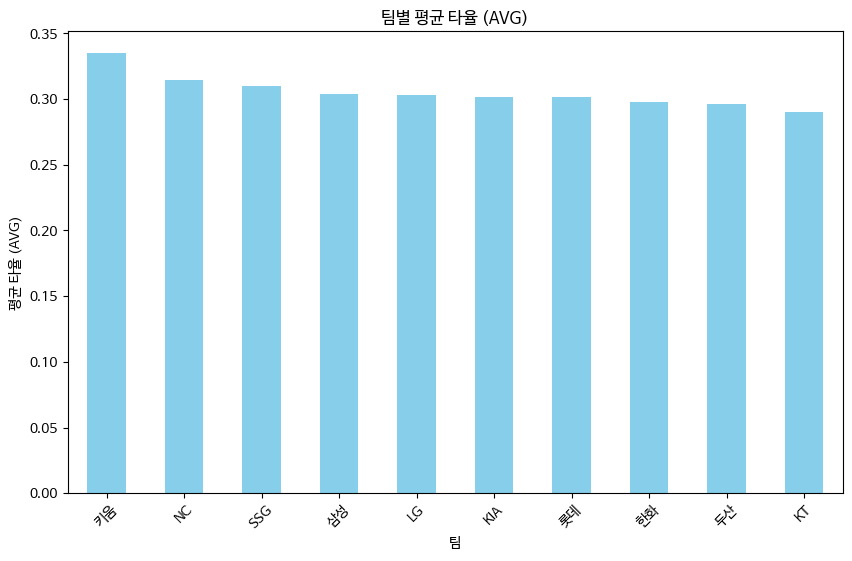

In [9]:
#타자 팀내 평균 타율 시각화
team_avg = df1.groupby('Team')['AVG'].mean()

plt.figure(figsize=(10, 6))
team_avg.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('팀별 평균 타율 (AVG)')
plt.xlabel('팀')
plt.ylabel('평균 타율 (AVG)')
plt.xticks(rotation=45)
plt.show()

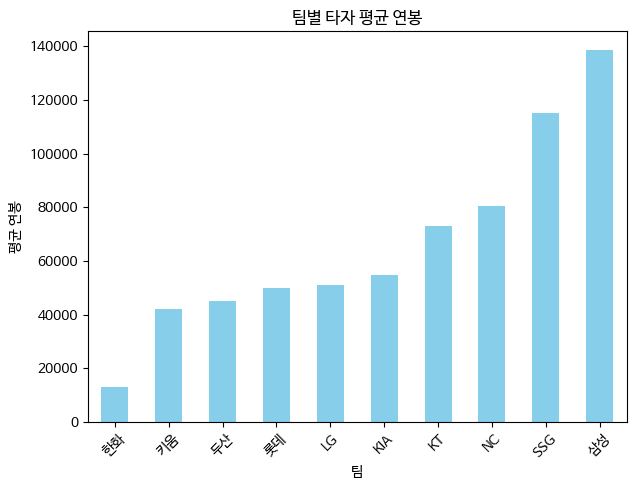

In [10]:
# 타자 평균 연봉 시각화
avg_salary_batters = df1.groupby('Team')['SALARY'].mean()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
avg_salary_batters.sort_values().plot(kind='bar', color='skyblue')
plt.title('팀별 타자 평균 연봉')
plt.xlabel('팀')
plt.ylabel('평균 연봉')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# 'HR' 열을 기준으로 두 그룹 나누기
high_hr = df1[df1['HR'] >= df1['HR'].median()]
low_hr = df1[df1['HR'] < df1['HR'].median()]

# 독립 표본 t-검정 수행
t_statistic, p_value = ttest_ind(high_hr['AVG'], low_hr['AVG'])

# 결과 출력
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# 유의수준 0.05에서의 가설 검정
alpha = 0.05
if p_value < alpha:
    print("홈런을 많이 친다고해서 타자순위에 높게 올라가지 않을 것으로 예상됩니다.")
else:
    print("홈런을 많이 친다고해서 타자순위에 높게 올라갈 것으로 예상됩니다.")


T-statistic: -0.9018008233840958
P-value: 0.3748549418329332
귀무가설을 기각할 수 없습니다. 홈런을 많이 친다고해서 타자순위에 높게 올라갈 것으로 기대됩니다.


In [12]:
# 타자의 연봉 대비 성과 비율 계산
df1['Performance_Index'] = (df1['AVG'] + df1['HR'] + df1['RBI']) / df1['SALARY']

# 최고의 '돈 대비 가치' 플레이어 식별
top_batters = df1.sort_values(by='Performance_Index', ascending=False).head()
top_batters


,Name,Team,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF,SALARY,Performance_Index
15,노시환,한화,0.298,131,595,514,85,153,30,1,31,278,101,0,3,13000,0.010177
19,문성주,LG,0.294,136,534,449,77,132,21,4,2,167,57,6,4,9500,0.006241
14,문보경,LG,0.301,131,542,469,77,141,29,5,10,210,72,9,4,17000,0.004841
17,김민혁,KT,0.297,113,448,397,68,118,20,3,3,153,41,7,5,15000,0.002953
11,양의지,두산,0.305,129,510,439,56,134,23,0,17,208,68,0,3,30000,0.002844


-회귀 계수-

독립 변수(여기서는 AVG)가 한 단위 변할 때 종속 변수(HR 또는 RBI)가 얼마나 변하는지를 나타냅니다.
예를 들어, 회귀 계수가 양수라면 타율이 증가할수록 홈런이나 타점이 증가한다는 것을 의미합니다.

-결정 계수 (R² 값)-

결정 계수는 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다.
R² 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있다고 볼 수 있습니다.
반면, R² 값이 낮다면 모델이 데이터를 충분히 설명하지 못하고 있는 것을 의미할 수 있습니다.
시각적 분석 (Visualization):

산점도와 회귀선을 통해 AVG와 HR 또는 RBI 사이의 관계를 시각적으로 파악할 수 있습니다.
데이터가 회귀선 주변에 밀집되어 있으면 두 변수 사이에 강한 선형 관계가 있음을 나타낼 수 있습니다.

-성능 평가 및 해석-

선형 회귀 모델의 성능을 평가하고, 이를 통해 타자의 성적(평균 타율)이 팀 성적(홈런, 타점)에 얼마나 영향을 미치는지 해석할 수 있습니다.
모델이 실제 데이터를 얼마나 잘 반영하는지에 따라, 타율이 팀의 득점력에 중요한 요소인지 판단할 수 있습니다.
이 분석을 통해 얻은 정보는 코치가 선수 구성 및 전략을 결정하는 데 도움이 될 수 있습니다. 예를 들어, 타율이 홈런과 강한 상관관계를 보이면, 높은 타율의 선수를 활용하여 득점력을 높일 수 있는 전략을 세울 수 있습니다.

홈런에 대한 회귀 계수: [-122.84628297]
홈런에 대한 결정 계수(R^2): 0.06742662054650694
타점에 대한 회귀 계수: [-141.13720118]
타점에 대한 결정 계수(R^2): 0.019618107974370136


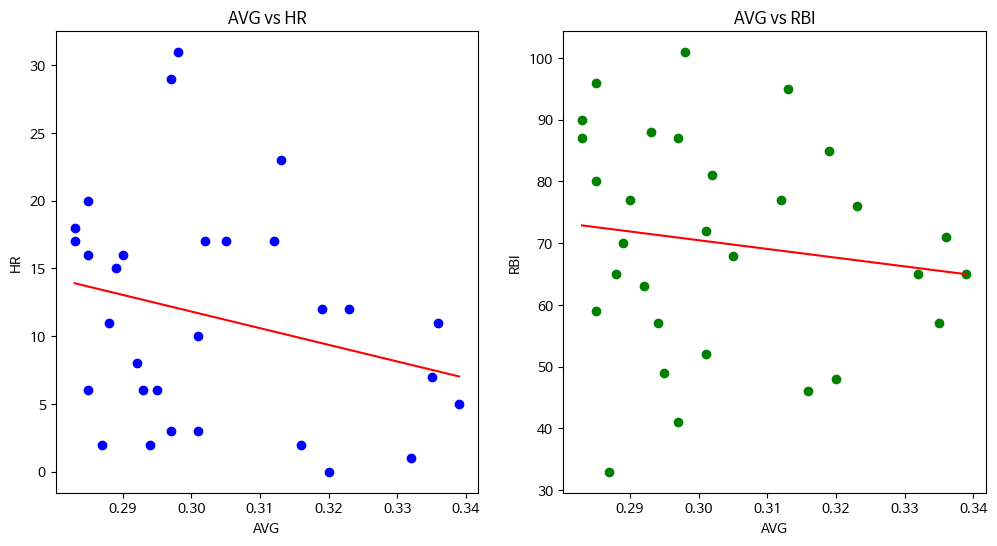

In [13]:
# 타율 독립 변수
X = df1[['AVG']]

# 종속변수 홈런
Y_hr = df1['HR']
# 종속변수 타점
Y_rbi = df1['RBI']


model_hr = LinearRegression().fit(X, Y_hr)
model_rbi = LinearRegression().fit(X, Y_rbi)

#결과
print("홈런에 대한 회귀 계수:", model_hr.coef_)
print("홈런에 대한 결정 계수(R^2):", model_hr.score(X, Y_hr))
print("타점에 대한 회귀 계수:", model_rbi.coef_)
print("타점에 대한 결정 계수(R^2):", model_rbi.score(X, Y_rbi))

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, Y_hr, color='blue')
plt.plot(X, model_hr.predict(X), color='red')
plt.title('AVG vs HR')
plt.xlabel('AVG')
plt.ylabel('HR')

plt.subplot(1, 2, 2)
plt.scatter(X, Y_rbi, color='green')
plt.plot(X, model_rbi.predict(X), color='red')
plt.title('AVG vs RBI')
plt.xlabel('AVG')
plt.ylabel('RBI')

plt.show()


ERA (Earned Run Average): 평균자책점

G (Games Played): 출장 경기 수

W (Wins): 승리

L (Losses): 패배

SV (Saves): 세이브 - 경기 막판에 등판하여 리드를 지켜 승리를 보존한 횟수입니다.

HLD (Holds): 홀드 - 세이브 상황이 아닌, 리드를 지키고 이어주는 상황에서 등판하여 팀의 리드를 유지한 횟수입니다.

WPCT (Winning Percentage): 승률

IP (Innings Pitched): 이닝 - 투수가 던진 총 이닝 수입니다.

H (Hits): 허용 안타

BB (Base on Balls): 볼넷

HBP (Hit By Pitch): 사구

SO (Strikeouts): 삼진

R (Runs): 실점

ER (Earned Runs): 자책점

WHIP (Walks plus Hits per Inning Pitched): 이닝당 출루 허용률.

SALARY: 연봉

In [22]:
df2

,Name,Team,ERA,G,W,L,SV,HLD,WPCT,IP,H,BB,HBP,SO,R,ER,WHIP,SALARY,Value_Index
1,페디,NC,2.00,30,20,6,0,0,0.769,180 1/3,137,35,4,209,46,40,0.95,104000,0.002183
2,안우진,키움,2.39,24,9,7,0,0,0.563,150 2/3,121,38,1,164,44,40,1.06,35000,0.004875
3,뷰캐넌,삼성,2.54,30,12,8,0,0,0.600,188,174,43,6,139,71,53,1.15,143000,0.001038
4,후라도,키움,2.65,30,11,8,0,0,0.579,183 2/3,164,41,9,147,64,54,1.12,110500,0.001406
5,알칸타라,두산,2.67,31,13,9,0,0,0.591,192,171,35,5,162,67,57,1.07,65000,0.002651
6,고영표,KT,2.78,28,12,7,0,0,0.632,174 2/3,181,19,9,114,57,54,1.15,43000,0.002866
7,원태인,삼성,3.24,26,7,7,0,0,0.500,150,157,34,6,102,61,54,1.27,35000,0.003022
8,반즈,롯데,3.28,30,11,10,0,0,0.524,170 1/3,171,56,15,147,68,62,1.33,110500,0.001400
9,임찬규,LG,3.42,30,14,3,0,0,0.824,144 2/3,142,54,5,103,63,55,1.35,17000,0.006681
10,박세웅,롯데,3.45,27,9,7,0,0,0.563,154,145,59,4,129,70,59,1.32,150000,0.000897


In [21]:
#최저 평균자책점 선두 선수
leading_pitchers_era = df2.loc[df2['ERA'].idxmin()]

#최다 승리 선두 선수
leading_pitchers_wins = df2.loc[df2['W'].idxmax()]

#최다 삼진 선두 선수
leading_pitchers_strikeouts = df2.loc[df2['SO'].idxmax()]

print("최저 평균자책점: ", leading_pitchers_era)
print("최다 승리: ", leading_pitchers_wins)
print("최다 삼진: ", leading_pitchers_strikeouts)

최저 평균자책점:  Name                 페디
Team                 NC
ERA                 2.0
G                    30
W                    20
L                     6
SV                    0
HLD                   0
WPCT              0.769
IP              180 1/3
H                   137
BB                   35
HBP                   4
SO                  209
R                    46
ER                   40
WHIP               0.95
SALARY           104000
Value_Index    0.002183
Name: 1, dtype: object
최다 승리:  Name                 페디
Team                 NC
ERA                 2.0
G                    30
W                    20
L                     6
SV                    0
HLD                   0
WPCT              0.769
IP              180 1/3
H                   137
BB                   35
HBP                   4
SO                  209
R                    46
ER                   40
WHIP               0.95
SALARY           104000
Value_Index    0.002183
Name: 1, dtype: object
최다 삼진:  Name           

<ipython-input-15-aac345ca20ce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_pitching_stats = df2.groupby('Team').mean()


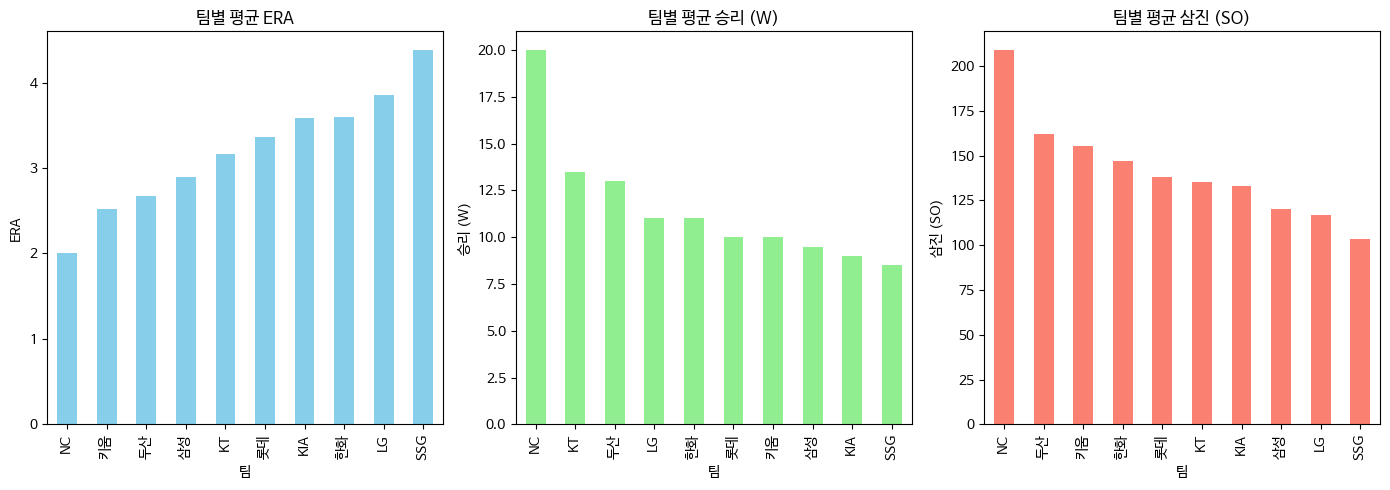

,ERA,W,SO
Team,,,
KIA,3.580,9.0,133.000000
KT,3.160,13.5,135.500000
LG,3.850,11.0,116.666667
NC,2.000,20.0,209.000000
SSG,4.380,8.5,103.500000
두산,2.670,13.0,162.000000
롯데,3.365,10.0,138.000000
삼성,2.890,9.5,120.500000
키움,2.520,10.0,155.500000


In [15]:
# 2. 팀별 투수 성적 계산
team_pitching_stats = df2.groupby('Team').mean()

# 팀별 ERA, 승리(W), 삼진 (시각화)
plt.figure(figsize=(14, 5))

# 팀별 평균 ERA (시각화)
plt.subplot(1, 3, 1)
team_pitching_stats['ERA'].sort_values().plot(kind='bar', color='skyblue')
plt.title('팀별 평균 ERA')
plt.xlabel('팀')
plt.ylabel('ERA')

# 팀별 평균 승리 (시각화)
plt.subplot(1, 3, 2)
team_pitching_stats['W'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('팀별 평균 승리 (W)')
plt.xlabel('팀')
plt.ylabel('승리 (W)')

# 팀별 평균 삼진 (시각화)
plt.subplot(1, 3, 3)
team_pitching_stats['SO'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('팀별 평균 삼진 (SO)')
plt.xlabel('팀')
plt.ylabel('삼진 (SO)')

plt.tight_layout()
plt.show()

# 팀별 투수 성적 출력
team_pitching_stats[['ERA', 'W', 'SO']]


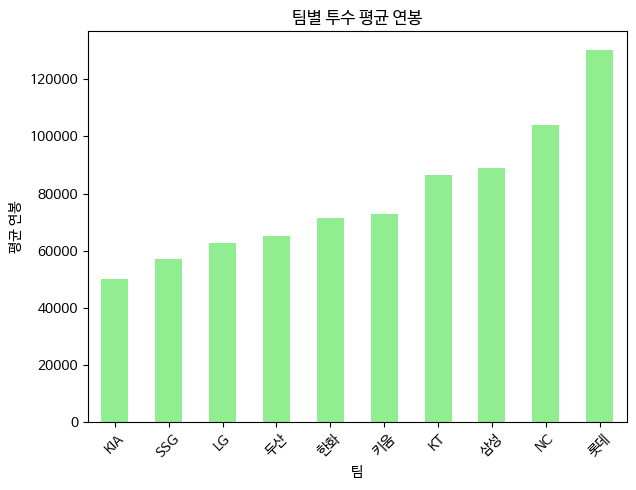

In [16]:
plt.figure(figsize=(12, 5))

# 투수 평균 연봉 (시각화)
avg_salary_pitchers = df2.groupby('Team')['SALARY'].mean()

plt.subplot(1, 2, 2)
avg_salary_pitchers.sort_values().plot(kind='bar', color='lightgreen')
plt.title('팀별 투수 평균 연봉')
plt.xlabel('팀')
plt.ylabel('평균 연봉')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
#투수의 연봉 대비 성과 비율 계산
df2['Value_Index'] = (df2['W'] + df2['SO'] - df2['ERA']) / df2['SALARY']

top_value_pitchers = df2.sort_values(by='Value_Index', ascending=False).head()
top_value_pitchers[['Name', 'Team', 'ERA', 'W', 'SO', 'SALARY', 'Value_Index']]

,Name,Team,ERA,W,SO,SALARY,Value_Index
9,임찬규,LG,3.42,14,103,17000,0.006681
17,오원석,SSG,5.23,8,88,14000,0.006484
2,안우진,키움,2.39,9,164,35000,0.004875
16,최원태,LG,4.30,9,118,35000,0.003506
7,원태인,삼성,3.24,7,102,35000,0.003022


삼진 수가 팀 성적과 얼마나 연관이 있는지를 파악하는 데 도움을 줄 것입니다.
팀별 삼진(SO) 수와 순위 분석 결과
시각화를 통해 팀별 삼진(SO) 수와 순위 간의 관계를 살펴본 결과

NC, 삼성, 키움 팀의 삼진 수 데이터가 제공되어 이들 팀에 대해서만 분석이 가능했습니다.

NC 팀은 가장 많은 삼진 수와 높은 순위(4위)를 기록했습니다.

삼성 팀은 중간 정도의 삼진 수를 기록하며 8위를 차지했습니다.

키움 팀은 높은 삼진 수를 기록했음에도 불구하고 9위를 기록했습니다.

-승리의 중요성-

승리의 수가 순위 결정에 중요한 역할을 합니다. 승리가 많은 팀은 높은 순위를 차지하는 경향이 있으며, 이는 경기에서의 성공이 리그에서의 전반적인 성공으로 이어짐을 시사합니다.

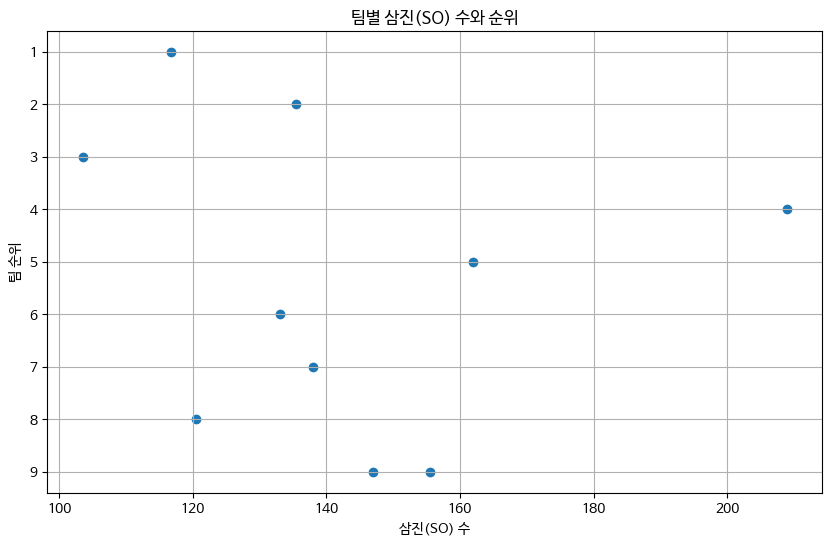

,Team,SO
1,LG,116.666667
2,KT,135.500000
3,SSG,103.500000
4,NC,209.000000
5,두산,162.000000
6,KIA,133.000000
7,롯데,138.000000
8,삼성,120.500000
9,한화,147.000000
10,키움,155.500000


In [18]:
team_standings_data = {
    "Team": ["LG", "KT", "SSG", "NC", "두산", "KIA", "롯데", "삼성", "한화", "키움"],
    "Games": [144, 144, 144, 144, 144, 144, 144, 144, 144, 144],
    "Wins": [86, 79, 76, 75, 74, 73, 68, 61, 58, 58],
    "Losses": [56, 62, 65, 67, 68, 69, 76, 82, 80, 83],
    "Draws": [2, 3, 3, 2, 2, 2, 0, 1, 6, 3]
}
team_standings = pd.DataFrame(team_standings_data)

# 팀별 순위
team_standings['Rank'] = team_standings['Wins'].rank(ascending=False, method='min').astype(int)

# 팀별 삼진
team_standings = team_standings.merge(team_pitching_stats[['SO']], on='Team', how='left')

# 삼진 수와 순위 간의 관계 분석 (시각화)
plt.figure(figsize=(10, 6))
plt.scatter(team_standings['SO'], team_standings['Rank'])
plt.gca().invert_yaxis()
plt.title('팀별 삼진(SO) 수와 순위')
plt.xlabel('삼진(SO) 수')
plt.ylabel('팀 순위')
plt.grid(True)
plt.show()

team_standings.index = range(1, len(team_standings) + 1)

team_standings[['Team', 'SO']]


투수 데이터를 이용해 회귀분석을 수행하겠습니다. 이 분석의 목적은 선수의 성적과 연봉 간의 관계를 파악하는 것입니다.

회귀분석은 통계적 방법을 사용하여 변수 간의 관계를 모델링합니다.

연봉(SALARY)을 종속 변수로, 주요 투수 성적 지표(예: ERA, 승리, 삼진 등)를 독립 변수로 사용할 것입니다.

모델 계수
ERA 계수: -12.54
승리(W) 계수: 353.66
삼진(SO) 계수: 1446.78
모델 해석
ERA: ERA가 1 단위 증가할 때마다 연봉은 평균적으로 12.54 단위 감소합니다.
즉, ERA가 낮을수록 연봉이 높아지는 경향이 있음을 나타냅니다.
승리(W): 승리가 1 단위 증가할 때마다 연봉은 평균적으로 353.66 단위 증가합니다. 승리가 많은 투수가 더 높은 연봉을 받는 경향이 있음을 보여줍니다.
삼진(SO): 삼진이 1 단위 증가할 때마다 연봉은 평균적으로 1446.78 단위 증가합니다. 삼진을 많이 잡는 투수가 높은 연봉을 받는 경향이 있음을 나타냅니다.

모델 성능
평균 제곱 오차(MSE): 20,480,556,955.64
R² 점수: NaN

In [19]:
 # 독립 변수 (ERA, 승리, 삼진)
X = df2[['ERA', 'W', 'SO']]

# 종속 변수 (연봉)
y = df2['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

#성능평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients, intercept, mse, r2

(array([-16177.56380246,  -3165.41854938,    650.2186206 ]),
 85828.97308230474,
 3862231330.9963627,
 -0.37976871181239646)